In [ ]:
## Importing Inital Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from collections import Counter
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
warnings.filterwarnings('ignore')


## Data Preprocessing

In [4]:
data=pd.read_csv('telecom_churn_data (1).csv')

In [5]:
data.info()  # Getting the info for the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
data.head() # Looking at the glance of the data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
# Selecting columns with zero variance and droping them
data_describe = data.describe()
data_std = pd.DataFrame(data_describe.loc['std',:])
data_std=data_std[data_std['std']==0]
data.drop(data_std.index,1,inplace=True)

In [8]:
#dropping mobile number as it will not be required for the prediction
data.drop('mobile_number',1,inplace=True)
data.shape

(99999, 213)

##  Churn Column for 9th Month

In [68]:
### For the target data we will use 9th month to check if a customer churns in this month or not

In [9]:
#Creating Churn Columns
churn_columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
for col in churn_columns:
    print('Null value in {} column : {}'.format(col,data[col].isnull().sum()))

Null value in total_ic_mou_9 column : 0
Null value in total_og_mou_9 column : 0
Null value in vol_2g_mb_9 column : 0
Null value in vol_3g_mb_9 column : 0


In [10]:
data['Usage_9'] = np.sum(data[churn_columns],axis=1)
data['Churn']=np.where(data['Usage_9'] == 0,1,0)

In [11]:
#Dropping all columns for 9th Month
for col in data.columns:
    if col[-2:]=='_9':
        data.drop(col,1,inplace=True)

## Filtering the High Value Customer

In [12]:
print('Missing Value in total_rech_amt_6 :{}'.format(data['total_rech_amt_6'].isnull().sum()))
print('Missing Value in total_rech_amt_7 :{}'.format(data['total_rech_amt_7'].isnull().sum()))

Missing Value in total_rech_amt_6 :0
Missing Value in total_rech_amt_7 :0


In [13]:
# Filtering Customers with Average reacharge in Good phase more than 70th percentile
data['average_rech_amt']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2
data= data[data['average_rech_amt'] > np.quantile(data['average_rech_amt'],0.7)]
data.shape

(29979, 163)

## Missing Value Treatment

In [14]:
missing_values=pd.DataFrame(data.isnull().sum()*100/len(data),columns=['Per_Missing'])
missing_values=missing_values[missing_values['Per_Missing']> 0]
missing_values.sort_values('Per_Missing',ascending=False,inplace=True)

In [15]:
#Dropping Columns with more than 50% Missing
missing_50=missing_values[missing_values['Per_Missing'] > 50]
data.drop(missing_50.index.values,1,inplace=True)

In [16]:
# Columns with Less than 50 % missing Values
missing=missing_values[missing_values['Per_Missing'] < 50]

In [17]:
# Analysing Unique Missing Columns for Data type and Strategy to imputation
unique_missing=pd.unique([col[0:len(col)-2] for col in missing.index])

In [18]:
unique_missing

array(['std_ic_t2m_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'spl_ic_mou', 'std_ic_t2f_mou',
       'std_ic_mou', 'isd_og_mou', 'isd_ic_mou', 'ic_others',
       'spl_og_mou', 'loc_ic_t2f_mou', 'loc_og_t2m_mou', 'loc_og_mou',
       'loc_og_t2f_mou', 'onnet_mou', 'std_og_t2f_mou', 'offnet_mou',
       'std_og_t2t_mou', 'roam_ic_mou', 'std_og_mou', 'loc_og_t2c_mou',
       'roam_og_mou', 'std_og_t2m_mou', 'loc_og_t2t_mou',
       'date_of_last_rech', 'last_date_of_month'], dtype=object)

In [19]:
# Imputing last date of recharge column with mode of the columns
months=['_6','_7','_8']
for month in months:
    data['date_of_last_rech'+month].fillna(data['date_of_last_rech'+month].mode()[0],inplace=True)

### Using Cluster Based Imputation technique to Impute missing Values in Columns

In [20]:
#Columns with no missing
non_missing_columns=pd.DataFrame(data.isnull().sum()*100/len(data),columns=['Per_Missing'])
non_missing_columns=non_missing_columns[non_missing_columns['Per_Missing']== 0]
non_missing_columns.reset_index(inplace=True)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
def fill_nan(value,label,group):
    if np.isnan(value)==True:
        return group[group.index==label].iloc[0,0]
    else:
        return value

In [24]:
impute_columns=list(unique_missing)
impute_columns.remove('date_of_last_rech')
impute_columns.remove('last_date_of_month')
impute_columns

['std_ic_t2m_mou',
 'og_others',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'spl_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'isd_og_mou',
 'isd_ic_mou',
 'ic_others',
 'spl_og_mou',
 'loc_ic_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_mou',
 'loc_og_t2f_mou',
 'onnet_mou',
 'std_og_t2f_mou',
 'offnet_mou',
 'std_og_t2t_mou',
 'roam_ic_mou',
 'std_og_mou',
 'loc_og_t2c_mou',
 'roam_og_mou',
 'std_og_t2m_mou',
 'loc_og_t2t_mou']

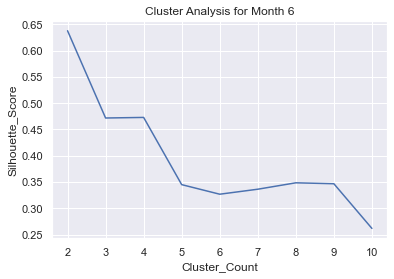

In [25]:
# Creating CLuster for Month 6 
columns_6=list(non_missing_columns[non_missing_columns['index'].str.contains('_6')]['index'])
columns_6.remove('last_date_of_month_6')
columns_6.remove('date_of_last_rech_6')
cluster_data=data[columns_6]
cluster_range=range(2,11)
score_silhouette=[]
for n_cluster in cluster_range:
    km=KMeans(n_clusters=n_cluster,random_state=1)
    km.fit(cluster_data)
    labels=km.predict(cluster_data)
    score=silhouette_score(cluster_data,labels)
    score_silhouette.append(score)

sns.set()
plt.plot(cluster_range,score_silhouette)
plt.xlabel('Cluster_Count')
plt.ylabel('Silhouette_Score')
plt.title('Cluster Analysis for Month 6')
plt.show()

In [26]:
# Selecting n_cluster as 3 and assiging groups for month 6
n_cluster=3
km=KMeans(n_clusters=n_cluster,random_state=1)
km.fit(cluster_data)
labels=km.predict(cluster_data)

In [27]:
columns=impute_columns
for col in impute_columns:
    col = col+"_6" 
    temp=data[[col]]
    temp['label']=labels
    group = temp.groupby('label').mean()
    temp[col]=temp.apply(lambda x: fill_nan(x[col],x['label'],group),axis=1)
    data[col]=temp[col]

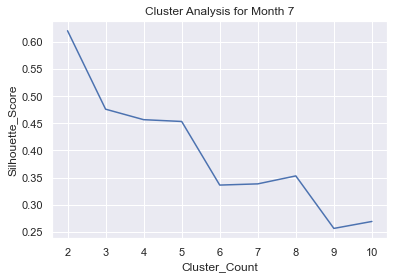

In [28]:
# Creating CLuster for Month 7 
columns_7=list(non_missing_columns[non_missing_columns['index'].str.contains('_7')]['index'])
#columns_7.remove('last_date_of_month_7')
columns_7.remove('date_of_last_rech_7')
cluster_data=data[columns_7]
cluster_range=range(2,11)
score_silhouette=[]
for n_cluster in cluster_range:
    km=KMeans(n_clusters=n_cluster,random_state=1)
    km.fit(cluster_data)
    labels=km.predict(cluster_data)
    score=silhouette_score(cluster_data,labels)
    score_silhouette.append(score)

sns.set()
plt.plot(cluster_range,score_silhouette)
plt.xlabel('Cluster_Count')
plt.ylabel('Silhouette_Score')
plt.title('Cluster Analysis for Month 7')
plt.show()

In [29]:
# Selecting n_cluster as 3 and assiging groups for month 7
n_cluster=3
km=KMeans(n_clusters=n_cluster,random_state=1)
km.fit(cluster_data)
labels=km.predict(cluster_data)

In [30]:
columns=impute_columns
for col in impute_columns:
    col = col+"_7" 
    temp=data[[col]]
    temp['label']=labels
    group = temp.groupby('label').mean()
    temp[col]=temp.apply(lambda x: fill_nan(x[col],x['label'],group),axis=1)
    data[col]=temp[col]

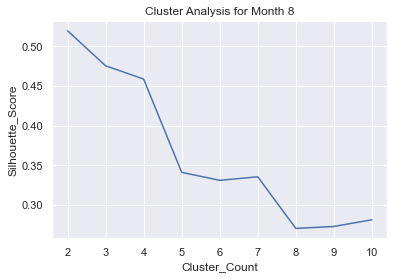

In [31]:
# Creating CLuster for Month 8
columns_8=list(non_missing_columns[non_missing_columns['index'].str.contains('_8')]['index'])
#columns_8.remove('last_date_of_month_8')
columns_8.remove('date_of_last_rech_8')
cluster_data=data[columns_8]
cluster_range=range(2,11)
score_silhouette=[]
for n_cluster in cluster_range:
    km=KMeans(n_clusters=n_cluster,random_state=1)
    km.fit(cluster_data)
    labels=km.predict(cluster_data)
    score=silhouette_score(cluster_data,labels)
    score_silhouette.append(score)

sns.set()
plt.plot(cluster_range,score_silhouette)
plt.xlabel('Cluster_Count')
plt.ylabel('Silhouette_Score')
plt.title('Cluster Analysis for Month 8')
plt.show()

In [32]:
# Selecting n_cluster as 5 and assiging groups for month 8
n_cluster=5
km=KMeans(n_clusters=n_cluster,random_state=1)
km.fit(cluster_data)
labels=km.predict(cluster_data)

In [33]:
columns=impute_columns
for col in impute_columns:
    col = col+"_8" 
    temp=data[[col]]
    temp['label']=labels
    group = temp.groupby('label').mean()
    temp[col]=temp.apply(lambda x: fill_nan(x[col],x['label'],group),axis=1)
    data[col]=temp[col]

In [34]:
#Rechecking Missing Values
missing_values=pd.DataFrame(data.isnull().sum()*100/len(data),columns=['Per_Missing'])
missing_values=missing_values[missing_values['Per_Missing']> 0]
missing_values.sort_values('Per_Missing',ascending=False,inplace=True)
missing_values

,Per_Missing
last_date_of_month_8,0.523700
last_date_of_month_7,0.103406


In [35]:
#Dropping last_date_of_month
data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

## Derived Feature Generation

In [36]:
# AON - Age on Network 
print('Minimum AON in years : {}'.format(round(np.min(pd.unique(data['aon']))/365,2)))
print('Maximum AON in years : {}'.format(round(np.max(pd.unique(data['aon']))/365,2)))

Minimum AON in years : 0.49
Maximum AON in years : 11.84


In [37]:
#Creating bins for the AON
bins=[0,1,2,3,5,10,15]
data['aon_bucket']=pd.cut(data['aon']/365,bins=bins,labels=['0-1','1-2','2-3','3-5','5-10','10-15'])

In [38]:
# Getting Days of Last Recharge for each month
data['day_of_last_rech_6']=pd.to_datetime(data['date_of_last_rech_6']).dt.day
data['day_of_last_rech_7']=pd.to_datetime(data['date_of_last_rech_7']).dt.day
data['day_of_last_rech_8']=pd.to_datetime(data['date_of_last_rech_8']).dt.day
#Droping date columns
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

## Exploratory Data Analysis

### Outlier Identification and Removal

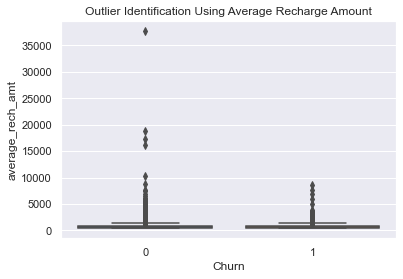

In [39]:
# Checking Distribution of Total Recharge Amount
sns.boxplot(x=data['Churn'],y=data['average_rech_amt'])
plt.title('Outlier Identification Using Average Recharge Amount')
plt.show()

**Removing the Outliers where Recharge Amount is > 10000**

In [40]:
print('Total Record Where Average Recharge Amount is Greater than 10000 : {}'.\
      format(len(data[data['average_rech_amt']>10000])))
print('Removing the Outliers')
data=data[data['average_rech_amt'] <= 10000]

Total Record Where Average Recharge Amount is Greater than 10000 : 5
Removing the Outliers


### Visualizing Churn

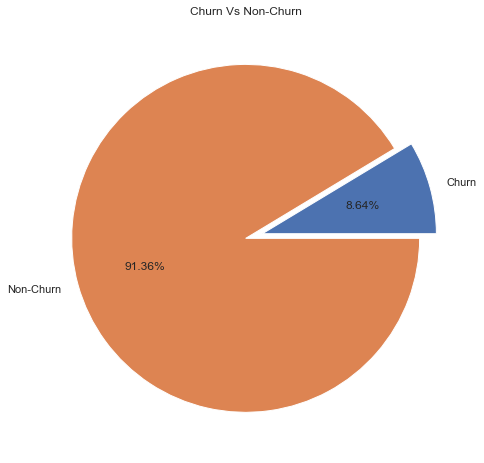

In [41]:
churn=dict(Counter(data['Churn']))[1]
non_churn=dict(Counter(data['Churn']))[0]
churn_per=churn*100/(churn+non_churn)
non_churn_per=non_churn*100/(churn+non_churn)

plt.figure(figsize=(8,8))
plt.pie([churn_per,non_churn_per],explode=(0.1,0),labels=['Churn','Non-Churn'],autopct='%0.02f%%')
plt.title('Churn Vs Non-Churn')
plt.show()

**As we can see from the distribution of Churn the class distribution is not uniform in nature**

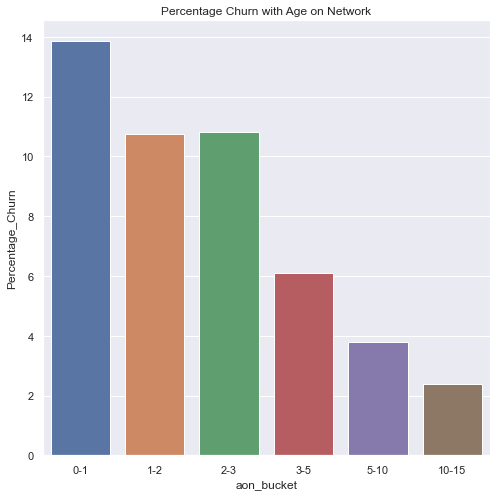

In [42]:
## Age of Network and Churn Relation

aon_group = data[['aon_bucket','Churn']].groupby('aon_bucket').agg({'Churn':['sum','count']})
aon_group.columns=['Churn_Customer','Total_Customer']
aon_group['Percentage_Churn']=aon_group['Churn_Customer']*100/aon_group['Total_Customer']
plt.figure(figsize=(8,8))
sns.barplot(aon_group.index,aon_group['Percentage_Churn'])
plt.title('Percentage Churn with Age on Network')
plt.show()

**As the Age on network increases the Percentage of Custome Churning Decreases**

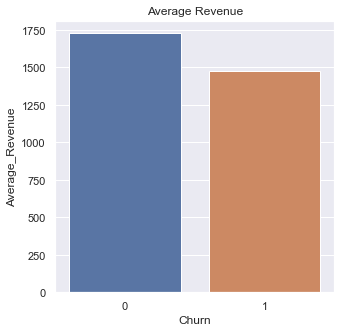

In [43]:
# Average Revenue per User
temp=pd.DataFrame(data[['arpu_6','arpu_7','arpu_8']].sum(axis=1))
temp['Churn']=data['Churn']
temp.columns=['Average_Revenue','Churn']
temp= temp.groupby('Churn').mean()
plt.figure(figsize=(5,5))
sns.barplot(temp.index,temp['Average_Revenue'])
plt.title('Average Revenue')
plt.show()

**The Average Reveune from the customer who are about to churn is far less than Non-Churn Customer**

In [44]:
# Deleting the Average Recharge Amount Columns
data.drop(['average_rech_amt'],inplace=True,axis=1)
data.shape

(29974, 130)

In [45]:
#Peroforming One Hot Encoding on AON-Bucket Columns
data = pd.concat([data,pd.get_dummies(data['aon_bucket'],prefix='aon_',drop_first=True)],axis=1)
data.drop(['aon_bucket'],axis=1,inplace=True)

In [46]:
data.shape

(29974, 134)

## Creating Train and Test Set and Scaling of Data

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
y=data['Churn']
x=data.drop('Churn',axis=1)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Balancing Data using SMOTE

**As we know that the data is imbalance where we have around 8.64% data is Churn and rest 91.36% data is Non-Churn there is high class imbalance in the data**.<br>
We will try to use ***Synthetic Minority Over-sampling Technique*** for balancing the dataset before we move to modelling stage 

In [51]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=1)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train) # we will be balancing data only in train data

## Scaling the Data Set

In [52]:
from sklearn.preprocessing import Normalizer
# scaler=MinMaxScaler()
# x_train_scale=scaler.fit_transform(x_train_res)
# x_test_scale=scaler.transform(x_test)



normalizer=Normalizer()
x_train_scale=normalizer.fit_transform(x_train_res)
x_test_scale=normalizer.transform(x_test)

## PCA - Based Method to Do Dimension Reduction

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca=PCA(random_state=1)
pca.fit(x_train_scale)

PCA(random_state=1)

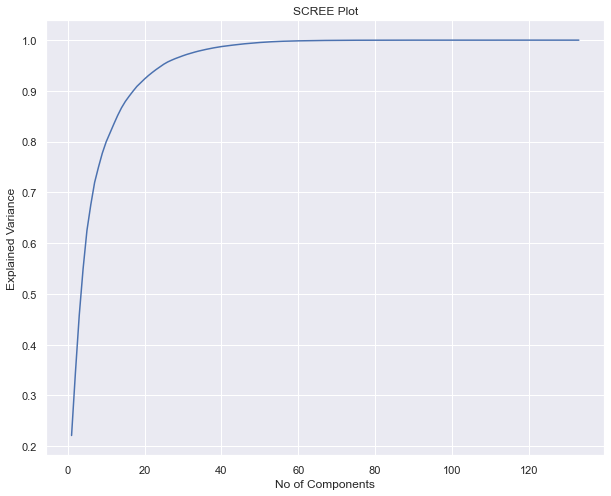

In [55]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
sns.lineplot(range(1,exp_var_cumul.shape[0]+1),exp_var_cumul)
plt.title('SCREE Plot')
plt.xlabel('No of Components')
plt.ylabel('Explained Variance')
plt.show()

**The Principle Component till 40 explains almost 98% variance in the data. So we will be selecting 40 Components**

In [56]:
pc=PCA(n_components=40, random_state=1)
x_train_pca = pc.fit_transform(x_train_scale)
x_test_pca=pc.transform(x_test)

## Creating Metrics for Model Validation

In [57]:
import sklearn.metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def metrics_model(y_true,y_pred,y_pred_prob):
    print("The Model Precision :{}".format(precision_score(y_true,y_pred)))
    print("The Model Recall :{}".format(recall_score(y_true,y_pred)))
    print("The Model f1-score :{}".format(f1_score(y_true,y_pred)))
    #print("The Model ROC-AUC :{}".format(metrics.roc_auc_score(y_true,y_pred_proba)))
    print("The Model Accuracy :{}".format(accuracy_score(y_true,y_pred)))
    print( confusion_matrix(y_true,y_pred))
    

## Classification Algorithm - using PCA Data

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':range(1,50,5)}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
grid_clf_acc.fit(x_train_pca, y_train_res)
print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=grid_clf_acc.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

LogisticRegression(C=46)
The Model Precision :0.4680589680589681
The Model Recall :0.7188679245283018
The Model f1-score :0.5669642857142857
The Model Accuracy :0.9029190992493745
[[5032  433]
 [ 149  381]]


In [60]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# grid_values = {'max_depth': [2,5,10],'alpha':range(1,50,5)}
# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
# grid_clf_acc.fit(x_train_pca, y_train_res)
# print(grid_clf_acc.best_estimator_)

# #Creating Metrics for Test data
# y_pred=grid_clf_acc.predict(x_test_pca)
# metrics_model(y_test,y_pred,1)

In [63]:
# from xgboost import XGBClassifier
# classifier=XGBClassifier()
# classifier.fit(x_train_pca, y_train_res)
# #Creating Metrics for Test data
# y_pred=classifier.predict(x_test_pca)
# metrics_model(y_test,y_pred,1)

In [65]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.0001, loss='perceptron',epsilon=0.0001)
grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=grid_clf_acc.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.4818941504178273
The Model Recall :0.6528301886792452
The Model f1-score :0.5544871794871795
The Model Accuracy :0.907256046705588
[[5093  372]
 [ 184  346]]


In [66]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.0001, loss='perceptron',epsilon=0.0001,penalty='elasticnet',max_iter=9999,class_weight={0:0,1:10})
#grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
#grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.09423112595065851
The Model Recall :0.9584905660377359
The Model f1-score :0.17159263637899003
The Model Accuracy :0.18181818181818182
[[ 582 4883]
 [  22  508]]


In [67]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.0001, loss='perceptron',epsilon=0.0001,penalty='elasticnet',max_iter=9999,class_weight={0:0,1:10})
#grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
#grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.1318844894313784
The Model Recall :0.8358490566037736
The Model f1-score :0.22782206222679352
The Model Accuracy :0.4990825688073395
[[2549 2916]
 [  87  443]]


In [249]:
from sklearn.ensemble import RandomForestClassifier 
clf= RandomForestClassifier()
clf.fit(x_train_pca,y_train_res)
clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.116751269035533
The Model Recall :0.9113207547169812
The Model f1-score :0.20698521534176134
The Model Accuracy :0.38265221017514595


In [ ]:
####Top 3 Models based on PCA Data 

In [198]:
from sklearn.naive_bayes import MultinomialNB
clf = BernoulliNB()
#grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
#grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.18932527693857
The Model Recall :0.7094339622641509
The Model f1-score :0.2988871224165342
The Model Accuracy :0.7057547956630525


In [244]:


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight={0:30,1:1})
#grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
#grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.5376
The Model Recall :0.6339622641509434
The Model f1-score :0.5818181818181818
The Model Accuracy :0.9194328607172644


In [203]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( criterion='gini',splitter='best',max_features='sqrt')
#grid_values = {'penalty': ['l1','l2'],'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
#grid_clf_acc.fit(x_train_pca, y_train_res)
clf.fit(x_train_pca, y_train_res)

#print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred=clf.predict(x_test_pca)
metrics_model(y_test,y_pred,1)

The Model Precision :0.10113960113960115
The Model Recall :0.5358490566037736
The Model f1-score :0.1701617735170761
The Model Accuracy :0.5379482902418682


## Classification Algorithm - using Scaled Data

In [73]:
## Sample
data_churned=data[data['Churn']==1]
data_not_churned=data[data['Churn']==0]
data_not_churned=data_not_churned.sample(n=5000,random_state=2) 
sampled_data=pd.concat([data_churned,data_not_churned],axis=0)
sampled_data=sampled_data.sample(frac=1)

In [74]:
y_sampled=sampled_data['Churn']
x_sampled=sampled_data.drop('Churn',axis=1)
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=42)

In [75]:
# scaler=MinMaxScaler()
# x_train_scale=scaler.fit_transform(x_train_res)
# x_test_scale=scaler.transform(x_test)
scaler=MinMaxScaler()
x_train_scale_sampled=scaler.fit_transform(x_train_sampled)
x_test_scale_sampled=scaler.transform(x_test_sampled)


# normalizer=Normalizer()
# x_train_scale_sampled=normalizer.fit_transform(x_train_sampled)
# x_test_scale_sampled=normalizer.transform(x_test_sampled)

In [76]:
len(x_train_scale_sampled)

6071

In [77]:
### FINAL MODEL 

from sklearn.linear_model import LogisticRegression
Sampled_clf=LogisticRegression()
Sampled_clf.fit(x_train_scale_sampled,y_train_sampled)
y_pred_sampled=Sampled_clf.predict(x_test_sampled)
metrics_model(y_test_sampled,y_pred_sampled,1)

The Model Precision :0.7825159914712153
The Model Recall :0.700381679389313
The Model f1-score :0.7391742195367572
The Model Accuracy :0.8293807641633728
[[892 102]
 [157 367]]


In [78]:
from sklearn.linear_model import SGDClassifier
Sampled_clf=SGDClassifier(alpha=0.0001,loss='perceptron')
Sampled_clf.fit(x_train_scale_sampled,y_train_sampled)
y_pred_sampled=Sampled_clf.predict(x_test_sampled)
metrics_model(y_test_sampled,y_pred_sampled,1)

The Model Precision :0.8524590163934426
The Model Recall :0.5954198473282443
The Model f1-score :0.701123595505618
The Model Accuracy :0.8247694334650857
[[940  54]
 [212 312]]


In [80]:
####FInal SGDC Grid Search 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier
grid_values = {'alpha':[0.1,0.01,0.001,1],'loss':['hinge','log','huber']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1_macro')
grid_clf_acc.fit(x_train_sampled, y_train_sampled)


print(grid_clf_acc.best_estimator_)

#Creating Metrics for Test data
y_pred_sampled=grid_clf_acc.predict(x_test_sampled)
metrics_model(y_test_sampled,y_pred_sampled,1)

SGDClassifier(alpha=0.001, class_weight={0: 0, 1: 10}, epsilon=0.0001,
              loss='huber', max_iter=9999, penalty='elasticnet')
The Model Precision :0.3451910408432148
The Model Recall :1.0
The Model f1-score :0.5132223310479922
The Model Accuracy :0.3451910408432148
[[  0 994]
 [  0 524]]


In [70]:
## Conclusion 
## 1] The top model based (Naive Bayes) on PCA Data accuracy is 70% and recall is 70%
## 2] The top model based (Logistic Regression) on scaled data accuracy is 82.9 % and recall is 70%